In [1]:
#https://github.com/tatsath/fin-ml/blob/master/Chapter%208%20-%20Unsup.%20Learning%20-%20Clustering/Case%20Study3%20-%20Hierarchial%20Risk%20Parity/HierarchicalRiskParity.ipynb
# https://www.mlq.ai/python-for-finance-portfolio-optimization/
# https://pypi.org/project/pyportfolioopt/
# https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html
# https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb

# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
# https://www.includehelp.com/python/how-to-multiple-columns-by-a-column-in-pandas.aspx
# https://wire.insiderfinance.io/inflation-and-stock-market-61cbeeebaaf5
# https://stackoverflow.com/questions/39992411/to-datetime-value-error-at-least-that-year-month-day-must-be-specified-pand
# https://stackoverflow.com/questions/54794431/adding-one-month-to-datetime64-with-timedelta
# https://sparkbyexamples.com/pandas/pandas-get-column-names/#:~:text=You%20can%20get%20the%20column,it%20using%20print()%20statement.
# https://duckduckgo.com/?q=create+names+for+index+of+df&ia=web
# https://www.statology.org/pandas-create-dataframe-from-existing-dataframe/
# https://www.tutorialspoint.com/create-a-dataframe-with-customized-index-parameters-in-pandas
# https://stackoverflow.com/questions/74010151/drop-a-column-based-on-row-values
# https://stackoverflow.com/questions/48997279/convert-one-column-in-python-dataframe-to-list
# https://www.statology.org/typeerror-expected-string-or-bytes-like-object/
# https://www.statology.org/typeerror-expected-string-or-bytes-like-object/
# https://stackoverflow.com/questions/45147100/pandas-drop-columns-with-all-nans
# https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy/21011822#21011822
# https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/
# https://pythoninoffice.com/get-values-rows-and-columns-in-pandas-dataframe/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
# https://datagy.io/python-combine-lists/

In [2]:
# !pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt
from datetime import *
from datetime import timedelta
import datetime
from dateutil.relativedelta import *
from datetime import date
from dateutil.relativedelta import relativedelta


pypfopt.__version__

#cpi imports
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import pytz


In [4]:
# # current_date = datetime.datetime.now()
# start_date = pytz.localize(2018, 1, 1)
# end_date = pytz.utc.localize(2019, 1, 1 )

In [5]:
# forwardtest_start = datetime.timedelta(days=-365)
# backtest_start = forwardtest_start + datetime.timedelta(days=-1400)
# walk_forward_step = datetime.timedelta(days=-365)

# start_date

In [6]:
##get cpi

start = dt.datetime(1900, 1, 1)
end = dt.datetime(2099, 1, 1)
cpi_monthly = web.DataReader('CPIAUCSL', 'fred', start, end)
# save the data
# file_path = f"/home/guest144/Desktop/cookbook/data/CPIAUCSL.csv"
file_path = f"/home/guest144/PyPortfolioOpt/cookbook/data/CPIAUCSL.csv"
cpi_monthly.to_csv(file_path)
# cpi_monthly= cpi_monthly.rename(columns={"DATE": "Date"})
cpi_monthly = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
cpi_monthly.index.names = ['Date']
print(cpi_monthly.shape)
cpi_monthly
# cpi_monthly_change = (cpi_monthly / cpi_monthly.shift(12) * 100 - 100)/100
# cpi_monthly_change =cpi_monthly_change.dropna()
# cpi_monthly_change[["Date"]]=cpi_monthly_change[["Date"]]+ relativedelta(months=+1)
# cpi_monthly_change

(909, 1)


,CPIAUCSL
Date,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-05-01,291.474
2022-06-01,295.328
2022-07-01,295.271


In [7]:
# cpi_monthly = cpi_monthly.reset_index(drop=True)

# cpi_monthly[["Date"]]= pd.to_datetime(cpi_monthly[["Date"]].stack()).unstack()

# cpi_monthly.Date = pd.Timestamp(cpi_monthly.Date) + pd.DateOffset(months=1)

# # pd.to_datetime(cpi_monthly[["Date"]])
# cpi_monthly.index = pd.to_datetime(cpi_monthly.index).date
# cpi_monthly[["Date"]] = cpi_monthly[["Date"]] +  relativedelta(months=+1)

In [8]:
cpi_monthly_change = ((cpi_monthly / cpi_monthly.shift(12) * 100 - 100)/100) /252 #for trading days in a year



cpi_monthly_change =cpi_monthly_change.dropna()

cpi_monthly_change = cpi_monthly_change.ffill()

# cpi_monthly_change=cpi_monthly_change.tz_localize('Etc/GMT+4')
cpi_monthly_change = cpi_monthly_change.reset_index(drop=False)
cpi_monthly_change.Date =cpi_monthly_change.Date+ pd.DateOffset(months=1)
cpi_monthly_change.set_index(['Date'],inplace=True)

cpi_monthly_change

,CPIAUCSL
Date,
1948-02-01,0.000406
1948-03-01,0.000376
1948-04-01,0.000271
1948-05-01,0.000328
1948-06-01,0.000372
...,...
2022-06-01,0.000338
2022-07-01,0.000357
2022-08-01,0.000337


In [9]:
# file_path2= f"/home/guest144/<<filelocation>>.csv"
# assets = pd.read_csv(file_path2)


# assets_list = assets['Symbol'].unique()

# cleanedList = [x for x in assets_list if str(x) != 'nan']
# tickers1 = cleanedList


tickers1 =[]

In [10]:
tickers2 = [ "AMZN", "TSLA", "GOOG", "WMT", "NFLX",
           "EXR", "MSFT", "MNST","KOLD", 
            "IAU"
          ]
tickers = tickers1+ tickers2


In [11]:




# tickers = [ "AMZN", "TSLA", "GOOG", "WMT", "NFLX",
#            "EXR", "MSFT", "MNST","KOLD", 
#           ]


ohlc = yf.download(tickers, period="max")
ohlc.dropna(axis=1, how='all')
prices = ohlc["Adj Close"]
prices

[*********************100%***********************]  10 of 10 completed


,AMZN,EXR,GOOG,IAU,KOLD,MNST,MSFT,NFLX,TSLA,WMT
Date,,,,,,,,,,
1972-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036018
1972-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035882
1972-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035473
1972-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035473
1972-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034927
...,...,...,...,...,...,...,...,...,...,...
2022-10-26,115.660004,171.440002,94.820000,31.600000,20.610001,92.010002,231.320007,298.619995,224.639999,141.139999
2022-10-27,110.959999,171.869995,92.599998,31.559999,22.520000,91.730003,226.750000,296.940002,225.089996,140.729996
2022-10-28,103.410004,178.710007,96.580002,31.219999,22.930000,93.540001,235.869995,295.720001,228.520004,142.509995


In [12]:
# ohlc
# prices
file_path3= f"/home/guest144/2022_10_17_jupyter/data/pyportfolioopt_data/ohlc.csv"
ohlc.dropna(axis=1, how='all')
ohlc.to_csv(file_path3)

In [13]:
returns=prices.pct_change(1)
# log_returns = np.log(prices/prices.shift(1))
# returns= log_returns
# returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns


,AMZN,EXR,GOOG,IAU,KOLD,MNST,MSFT,NFLX,TSLA,WMT
Date,,,,,,,,,,
1972-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003786
1972-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011400
1972-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1972-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015392
...,...,...,...,...,...,...,...,...,...,...
2022-10-26,-0.040962,-0.011132,-0.096350,0.006690,0.012776,0.003818,-0.077156,0.026115,0.009981,0.007639
2022-10-27,-0.040636,0.002508,-0.023413,-0.001266,0.092673,-0.003043,-0.019756,-0.005626,0.002003,-0.002905
2022-10-28,-0.068042,0.039798,0.042981,-0.010773,0.018206,0.019732,0.040220,-0.004109,0.015238,0.012648


In [14]:

# prices = ohlc["Adj Close"]
# prices = prices.tickers *2
# prices.tail()
# prices
df_merged= pd.merge(returns, cpi_monthly_change, how='left', on='Date')
df_merged[["CPIAUCSL"]] = df_merged[["CPIAUCSL"]].ffill()
# df_merged2 = df_merged.copy(deep=True)
# local_df =local_df.drop(columns=['CPIAUCSL'])
column_names = df_merged.columns.values.tolist()
df_uninflated = df_merged[column_names].subtract(df_merged["CPIAUCSL"], axis="index")
df_uninflated = df_uninflated.drop(columns=['CPIAUCSL'])

# df_merged=df_merged.drop(columns=['CPIAUCSL'])
returns = df_uninflated
# returns= df_merged
# df_merged
# print(returns.to_string())

In [15]:
from pypfopt import expected_returns

rets= returns
# returns.replace([np.inf, -np.inf], np.nan, inplace=True)
rets=rets.reset_index()
# rets = expected_returns.returns_from_prices(prices)
# rets = np.log(prices/prices.shift(1))
# rets = expected_returns.prices_from_returns(returns,log_returns=False) 
# rets=pypfopt.expected_returns.ema_historical_return(returns, returns_data=False, compounding=True, span=500, frequency=252, log_returns=False)
# rets = expected_returns.prices_from_returns(returns, log_returns=False) 
# rets =pypfopt.expected_returns.mean_historical_return(returns, returns_data=False, compounding=True, frequency=252, log_returns=False)

# mask_in_sample = (rets['Date'] >= start_date) & (rets['Date'] <= end_date)
# df_mask_is = rets.loc[mask_in_sample]
# mask_oos = (rets['Date'] >= oos_start1) & (rets['Date'] <= oos_end1)
# df_mask_oos = rets.loc[mask]
# rets.tail()
rets_saved = rets.copy(deep=True)


last_time = rets.Date.iloc[-1]
i = 0

mask_forward_test =(rets['Date'] >= last_time + walk_forward_step*(i+1)) \
    & (rets['Date'] <= last_time + walk_forward_step*i)
df_mask_forward_test = rets.loc[mask_forward_test]
# df_mask_forward_test =df_mask_forward_test.fillna(0)

mask_back_test =(rets['Date'] >= last_time + walk_forward_step*(i+1)+ backtest_start) \
    & (rets['Date'] < last_time + walk_forward_step*(i+1))
df_mask_back_test = rets.loc[mask_back_test]
# df_mask_back_test =df_mask_back_test.fillna(0)


#replace nan with 0
#select time range 
rets = df_mask_back_test
rets.set_index(['Date'], inplace=True)

rets =rets.dropna(axis=1, how='all')
rets = rets.fillna(0)

In [16]:
from pypfopt import HRPOpt
rets

,AMZN,EXR,GOOG,IAU,KOLD,MNST,MSFT,NFLX,TSLA,WMT
Date,,,,,,,,,,
2017-01-03,0.005001,-0.002527,0.018487,0.007153,0.192124,0.026997,0.007014,0.029739,0.015376,-0.006722
2017-01-04,0.004590,0.005254,0.000900,0.004413,0.055246,0.010473,-0.004541,0.014993,0.046018,0.005759
2017-01-05,0.030666,0.012973,0.008981,0.015098,-0.041446,0.003627,-0.000067,0.018479,-0.001124,0.002105
2017-01-06,0.019845,0.009236,0.015210,-0.007097,0.007127,-0.012407,0.008601,-0.005681,0.009900,-0.013793
2017-01-09,0.001102,-0.011936,0.000553,0.007013,0.100647,-0.026809,-0.003249,-0.000982,0.009845,0.006526
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,-0.004765,0.013447,0.000854,0.006814,-0.214313,-0.004345,-0.003546,0.010135,0.126402,0.011381
2021-10-26,0.016561,-0.006528,0.006264,-0.007774,0.044637,0.014008,0.006212,-0.004889,-0.006488,-0.008944
2021-10-27,0.004650,-0.018475,0.048153,0.002423,-0.049498,-0.008393,0.041900,-0.008591,0.018865,-0.008416


In [17]:
#consolidate
oldsharpe = .01
newsharpe = .02
old_rets = rets
new_rets = rets

while oldsharpe < newsharpe:
# i=0
# while i <= 2:
#     i += 1
    
    old_rets=new_rets
    hrp = HRPOpt(old_rets)
    hrp.optimize()
    weights = hrp.clean_weights()
    tuple_list = list(hrp.portfolio_performance())

    df_ret_vol_csharp = pd.DataFrame(tuple_list,columns = ['all'],
                                     index=["expected_return","volatility", "sharpe_ratio"])
    df_ret_vol_csharp_combined =df_ret_vol_csharp
    oldsharpe = df_ret_vol_csharp_combined.loc['sharpe_ratio','all']

    
    for column in old_rets:
        test_rets = old_rets.drop(column, axis=1)
        hrp = HRPOpt(test_rets)
        hrp.optimize()
        weights = hrp.clean_weights()
        tuple_list = list(hrp.portfolio_performance())
        df_ret_vol_csharp_2 = pd.DataFrame(tuple_list,columns = [column],\
                                          index=["expected_return","volatility", "sharpe_ratio"])
        df_ret_vol_csharp_combined= pd.concat([df_ret_vol_csharp_combined, df_ret_vol_csharp_2],axis=1)
        
    # df_ret_vol_csharp_combined
    remaining_column_names = df_ret_vol_csharp_combined.columns.values.tolist()
    df_minus = df_ret_vol_csharp_combined[remaining_column_names].\
                            subtract(df_ret_vol_csharp_combined["all"], axis="index")
    # keep only not bad ones
    df_cut = df_minus.loc[:, (df_minus.filter(items=["sharpe_ratio"], axis=0) <0).any()]
    df_cut
    new_rets = rets.filter(df_cut, axis=1)
    hrp = HRPOpt(new_rets)
    hrp.optimize()
    weights = hrp.clean_weights()
    tuple_list = list(hrp.portfolio_performance())

    df_ret_vol_csharp_2 = pd.DataFrame(tuple_list,columns = ['all'],
                                     index=["expected_return","volatility", "sharpe_ratio"])
    newsharpe = df_ret_vol_csharp_2.loc['sharpe_ratio','all']
    
#     old_rets_saved = old_rets.copy(deep=True)

    

In [18]:
oldsharpe
# rets.set_index('Date')
# rets.reset_index()
# old_rets =rets["EXR"]
# test_rets =rets["AMZN"] 
# test_rets = pd.merge(old_rets,rets[['Date', 'AMZN']],on ='Date', how='left')

# pd.merge(old_rets, rets["AMZN"], on=["Date", "AMZN"], how='left')
# pd.merge(old_rets, test_rets["AMZN"])

1.4733181117047736

In [19]:
# #expand
# new_rets=old_rets #set to before was equal or worse.
# while oldsharpe > newsharpe:
#     old_rets=new_rets
#     hrp = HRPOpt(old_rets)
#     hrp.optimize()
#     weights = hrp.clean_weights()
#     tuple_list = list(hrp.portfolio_performance())

#     df_ret_vol_csharp = pd.DataFrame(tuple_list,columns = ['inv_all'],
#                                      index=["expected_return","volatility", "sharpe_ratio"])
#     df_ret_vol_csharp_combined =df_ret_vol_csharp
#     oldsharpe = df_ret_vol_csharp_combined.loc['sharpe_ratio','inv_all']

#     #changing to add column from rets
#     for column in old_rets:
        
#         ###hmm this part isn't working can't get it to add one column from another df
# #         test_rets = old_rets.drop(column, axis=1)
#         test_rets = pd.merge(old_rets,rets[['Date', column]],on='Key_Column', how='left')
#         hrp = HRPOpt(test_rets)
#         hrp.optimize()
#         weights = hrp.clean_weights()
#         tuple_list = list(hrp.portfolio_performance())
#         df_ret_vol_csharp_2 = pd.DataFrame(tuple_list,columns = [column],\
#                                           index=["expected_return","volatility", "sharpe_ratio"])
#         df_ret_vol_csharp_combined= pd.concat([df_ret_vol_csharp_combined, df_ret_vol_csharp_2],axis=1)
        
#     # df_ret_vol_csharp_combined
#     remaining_column_names = df_ret_vol_csharp_combined.columns.values.tolist()
#     df_minus = df_ret_vol_csharp_combined[remaining_column_names].\
#                             subtract(df_ret_vol_csharp_combined["all"], axis="index")
#     # keep only not bad ones
#     df_cut = df_minus.loc[:, (df_minus.filter(items=["sharpe_ratio"], axis=0) <0).any()]
#     df_cut
#     new_rets = rets.filter(df_cut, axis=1)
#     hrp = HRPOpt(new_rets)
#     hrp.optimize()
#     weights = hrp.clean_weights()
#     tuple_list = list(hrp.portfolio_performance())

#     df_ret_vol_csharp_2 = pd.DataFrame(tuple_list,columns = ['all'],
#                                      index=["expected_return","volatility", "sharpe_ratio"])
#     newsharpe = df_ret_vol_csharp_2.loc['sharpe_ratio','inv_all']
    
#     old_rets_saved = old_rets.copy(deep=True)

    

In [20]:
oldsharpe
# rets = df_mask_forward_test
# rets.set_index(['Date'], inplace=True)

1.4733181117047736

In [21]:
hrp = HRPOpt(old_rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('EXR', 0.45797),
             ('IAU', 0.13518),
             ('KOLD', 0.05307),
             ('MSFT', 0.29216),
             ('TSLA', 0.06162)])

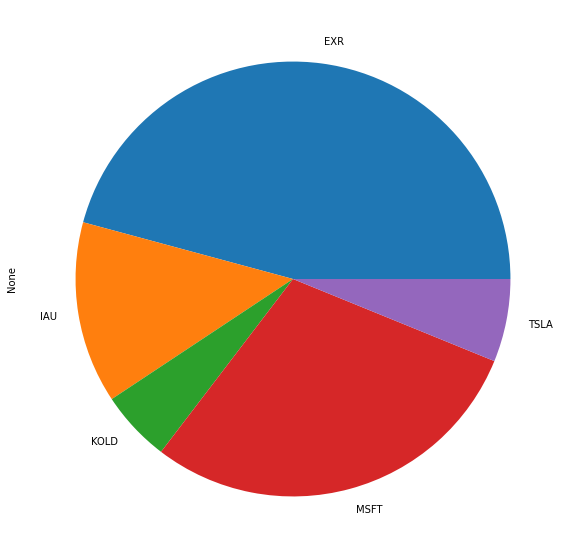

In [22]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [23]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 30.1%
Annual volatility: 19.1%
Sharpe Ratio: 1.47


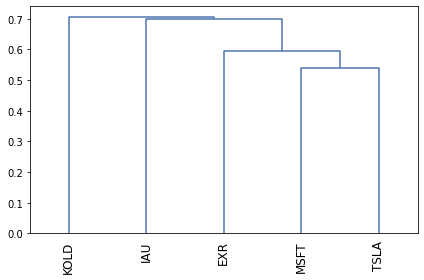

In [25]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);